In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first() 

('2017-08-23')

Query Date:  2016-08-23


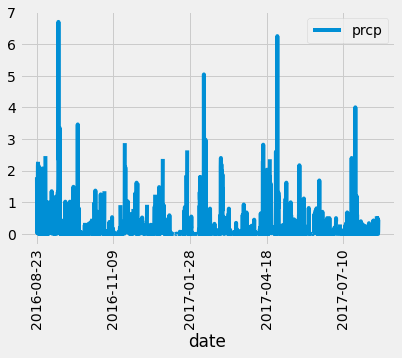

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# Perform a query to retrieve the date and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()
results

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(results)
prcp_df.set_index("date", inplace = True)
prcp_df

# Sort the dataframe by date
prcp_df = prcp_df.sort_values("date")
prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot = 90)



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
session.query(Station).count()

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(Measurement.station).group_by(Measurement.station).all()

[('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')]

In [14]:
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(71.66378066378067)]

In [16]:
session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(85.0)]

In [17]:
session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0)]

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_query_date = dt.date(2016, 8, 23) - dt.timedelta(days=365)

temp_results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= temp_query_date).all()
temp_results

[('2015-08-24', 72.0),
 ('2015-08-25', 79.0),
 ('2015-08-26', 72.0),
 ('2015-08-27', 75.0),
 ('2015-08-28', 77.0),
 ('2015-08-29', 82.0),
 ('2015-08-30', 77.0),
 ('2015-08-31', 76.0),
 ('2015-09-01', 76.0),
 ('2015-09-02', 73.0),
 ('2015-09-03', 74.0),
 ('2015-09-04', 75.0),
 ('2015-09-05', 83.0),
 ('2015-09-06', 76.0),
 ('2015-09-07', 81.0),
 ('2015-09-08', 81.0),
 ('2015-09-09', 84.0),
 ('2015-09-10', 85.0),
 ('2015-09-11', 80.0),
 ('2015-09-12', 79.0),
 ('2015-09-13', 81.0),
 ('2015-09-14', 79.0),
 ('2015-09-15', 76.0),
 ('2015-09-16', 80.0),
 ('2015-09-17', 80.0),
 ('2015-09-18', 80.0),
 ('2015-09-19', 78.0),
 ('2015-09-20', 79.0),
 ('2015-09-21', 80.0),
 ('2015-09-22', 80.0),
 ('2015-09-23', 77.0),
 ('2015-09-24', 77.0),
 ('2015-09-25', 74.0),
 ('2015-09-26', 75.0),
 ('2015-09-27', 74.0),
 ('2015-09-28', 77.0),
 ('2015-09-29', 78.0),
 ('2015-09-30', 80.0),
 ('2015-10-01', 77.0),
 ('2015-10-02', 73.0),
 ('2015-10-03', 76.0),
 ('2015-10-04', 74.0),
 ('2015-10-05', 75.0),
 ('2015-10-

In [22]:
temp_df = pd.DataFrame(temp_results)
temp_df.set_index("date", inplace = True)
temp_df

temp_df = temp_df.sort_values("date")
temp_df

,tobs
date,
2015-08-24,72.0
2015-08-25,79.0
2015-08-26,72.0
2015-08-27,75.0
2015-08-28,77.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


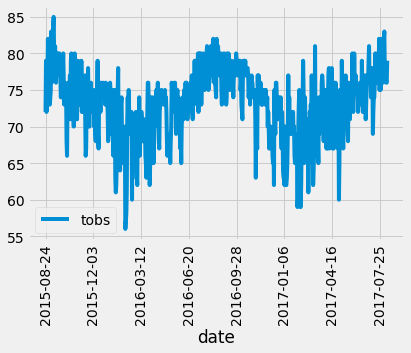

In [23]:
temp_df.plot(rot = 90)

# Close session

In [ ]:
# Close Session
session.close()